<a href="https://colab.research.google.com/github/paulinagonzalezg/test-analytics-engineering-lead/blob/main/PAULINA_DEACERO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio de Gestión
Tu equipo de Analytics Engineering está trabajando con un pipeline de datos clave para la organización que alimenta informes diarios utilizados por varias áreas de negocio. Sin embargo, el pipeline ha comenzado a fallar esporádicamente, provocando retrasos en la entrega de datos críticos. Las interrupciones no son constantes, pero cuando ocurren, generan importantes tiempos de inactividad y requieren intervención manual, lo que afecta la confianza en los datos.

El equipo tiene el 80% de su capacidad dedicada a tareas prioritarias de la unidad de negocio fuera de tu alcance, dejando solo el 20% disponible para abordar la optimización de este pipeline.

Objetivos:
Diseña una estrategia de optimización para este pipeline legado con el tiempo y recursos disponibles. Se debe reducir la frecuencia de fallos y minimizar el impacto en el tiempo de intervención manual, generando un uso eficiente de los recursos.
Diseña una arquitectura tecnológica moderna para la migración futura de este pipeline.
Información clave:
No se tiene restricciones tecnológicas o de licenciamientos por herramientas.
El pipeline gestiona una gran cantidad de datos provenientes de múltiples fuentes.
Las fallas ocurren esporádicamente debido a la latencia y a problemas con la calidad de los datos de algunas fuentes.
Las intervenciones manuales actuales consisten en verificar logs y reiniciar el proceso cuando los datos fallan en cargarse correctamente.
El equipo tiene acceso a herramientas de monitoreo básicas y logs, pero no hay automatización en el proceso de detección y resolución de problemas.
Solo cuentas con un 20% del tiempo del equipo para esta optimización, por lo que debes priorizar las soluciones de mayor impacto.

###Solucion:


**Corto Plazo (Implementación inmediata con 20% del equipo):**
* Automatización y detección de alertas: Configurar herramientas de monitoreo para enviar alertas automáticas.
* Retry automático: Implementar un mecanismo de reintentos automáticos para fuentes de datos que presenten problemas de latencia.
* Validación de calidad de datos: Crear scripts de validación que revisen la calidad y el formato de los datos antes de cargarlos en el pipeline (evita que datos incorrectos rompan el flujo).
* Documentación completa: Para una detección de problema e implementación rápida de solución.

**Mediano Plazo (3-6 meses)**:
* Caching de fuentes de datos: Para las fuentes de datos estables, evita latencias de fuentes con acceso esporádico, se descargan los datos con menor frecuencia y se almacenan temporalmente para un rápido acceso.
* Auditoría y logging: Mejorar el sistema de logging para facilitar el entendimiento de la causa raíz de los fallos. Por ejemplo con la integración de dashboards visuales para monitoreo.

**Largo Plazo(migración)**:
* Monitoreo avanzado: Migrar a un sistema de monitoreo como Datadog  que permita la detección temprana de anomalías y fallos en tiempo real. Integrar estos sistemas con soluciones de alerta y respuesta automática.
* Microservicios: Migrar el pipeline a una arquitectura de microservicios que permita un manejo modular de las fuentes de datos.

ECOSISTEMA GOOGLE




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DEACERO/bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##Limpieza de datos

In [ ]:
len(df)

41188

In [ ]:
#NULOS
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#unknown
df.apply(lambda col: (col == 'unknown').sum())

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
# Calcular el porcentaje de valores 'unknown' en cada columna
unknown_percentage = df.apply(lambda col: (col == 'unknown').sum() / len(col) * 100)
unknown_percentage

,0
age,0.000000
job,0.801204
marital,0.194231
education,4.202680
default,20.872584
housing,2.403613
loan,2.403613
contact,0.000000
month,0.000000
day_of_week,0.000000


In [ ]:
#Droppear unknown ya que no son significativos
df= df[~df.isin(['unknown']).any(axis=1)]

In [ ]:
len(df)

30488

In [ ]:
#Comprobar que no hay Unknowns
df.apply(lambda col: (col == 'unknown').sum())

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


##Exploración de las variables

In [ ]:
#data types de las diferentes columnas
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
#ejemplo de una posible alerta, se podria hacer con los data types de las variables
#assert df['age'].dtype == 'int64', "El tipo de dato de la columna age es incorrecto"

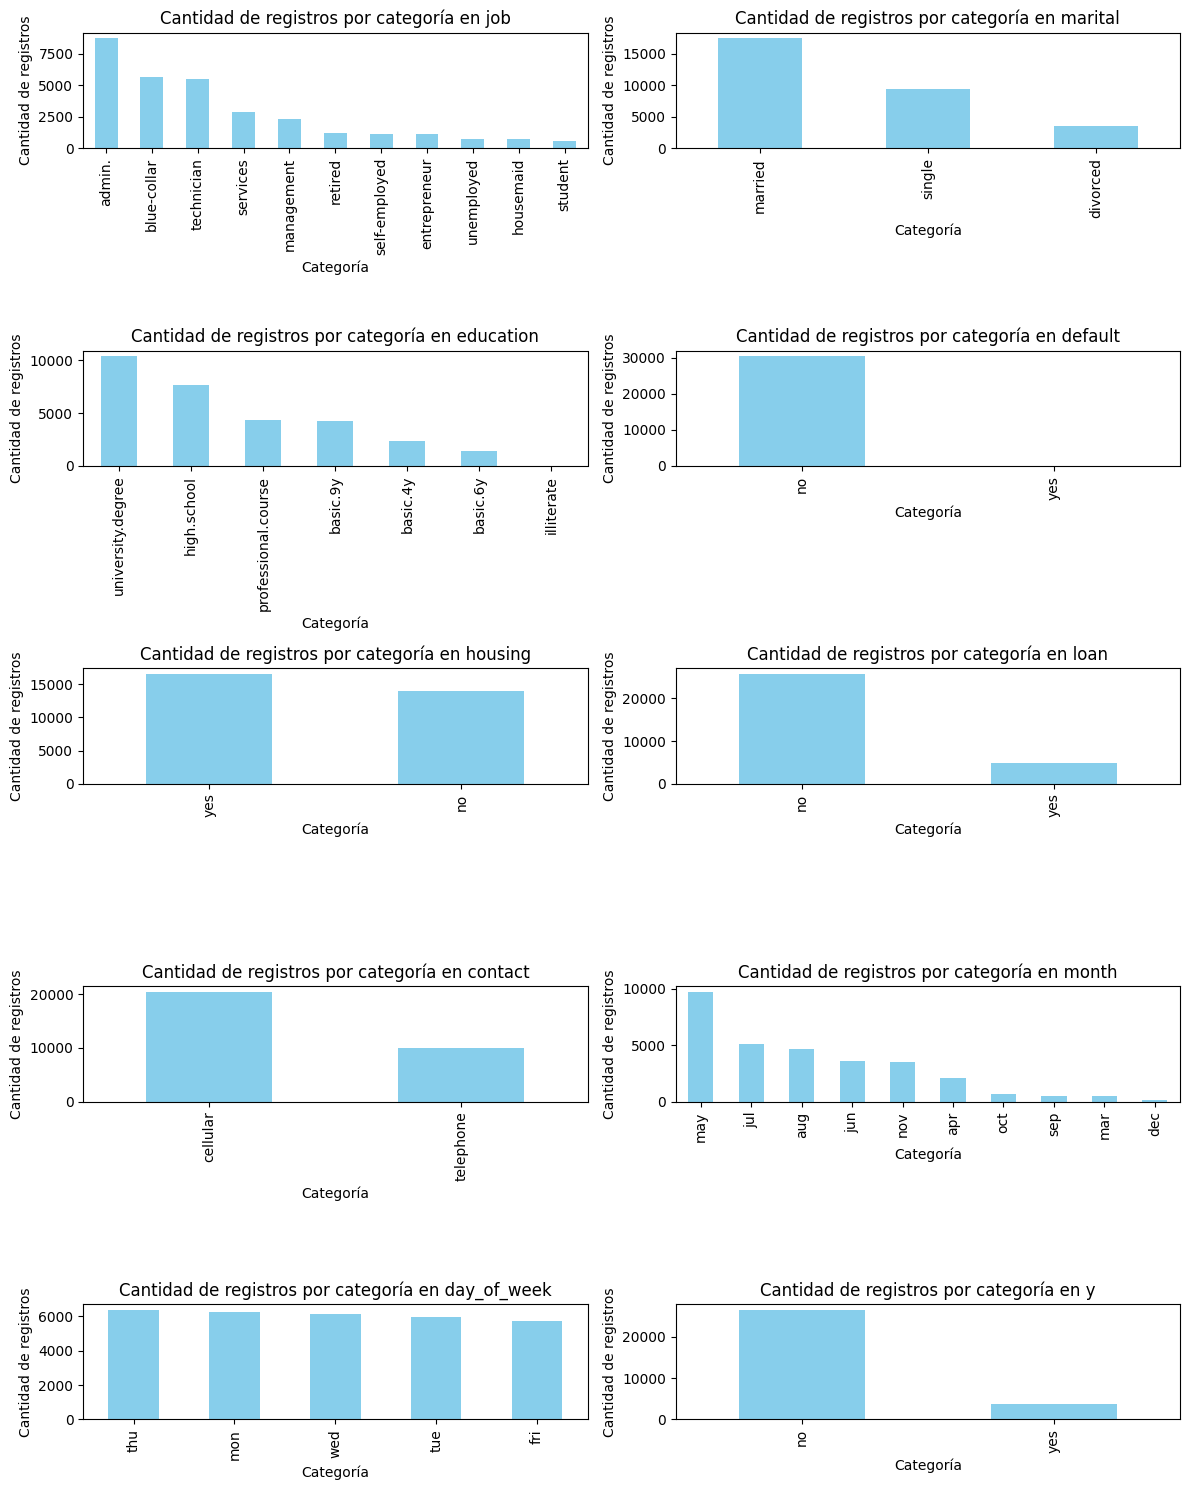

In [ ]:
# Analisis exploratorio de las variables categóricas
# Lista de las columnas categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'y']

# Configuración de tamaño de las figuras para las gráficas
plt.figure(figsize=(12, 15))

# Crear gráficos de barras para cada columna categórica
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)  # Crear subplots
    df[col].value_counts().plot(kind='bar', color='skyblue')  # Gráfico de barras
    plt.title(f'Cantidad de registros por categoría en {col}')  # Título
    plt.xlabel('Categoría')  # Etiqueta eje X
    plt.ylabel('Cantidad de registros')  # Etiqueta eje Y

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar las gráficas
plt.show()

##Variables

In [ ]:
sorted(df['age'].unique())

[17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 94,
 95]

In [ ]:
# Definir rango de edades
age_bins = [16, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Labels
age_labels = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

#cut by bin
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,31-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,31-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,71-80
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,41-50
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,51-60
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,41-50


In [ ]:
#df = df.drop(columns=['age_group'])

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group'],
      dtype='object')

In [ ]:
sorted(df['month'].unique())

['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']

In [ ]:
#agregar temporadas para cada mes
season_mapping = {
    'dec': 'Winter', 'jan': 'Winter', 'feb': 'Winter',
    'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
    'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer',
    'sep': 'Autumn', 'oct': 'Autumn', 'nov': 'Autumn'
}
# Mappeo
df['season'] = df['month'].map(season_mapping)

In [ ]:
df[['month', 'season']]

,month,season
0,may,Spring
2,may,Spring
3,may,Spring
4,may,Spring
6,may,Spring
...,...,...
41183,nov,Autumn
41184,nov,Autumn
41185,nov,Autumn
41186,nov,Autumn


In [ ]:
#Ver catalogo completo
grouped = df.groupby('season')['month'].unique().apply(lambda x: ', '.join(x))
grouped

,month
season,
Autumn,"oct, nov, sep"
Spring,"may, mar, apr"
Summer,"jun, jul, aug"
Winter,dec


In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,season
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60,Spring
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,31-40,Spring
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,31-40,Spring
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60,Spring
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,71-80,Autumn
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,41-50,Autumn
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,51-60,Autumn
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,41-50,Autumn


In [ ]:
# Crear un diccionario para mapear las categorías de educación
education_mapping = {
    'basic.4y': 'Low',
    'basic.6y': 'Low',
    'basic.9y': 'Low',
    'illiterate': 'Low',
    'high.school': 'Medium',
    'professional.course': 'Medium',
    'university.degree': 'High',
    'unknown': 'Desconocido'  # Considerar 'unknown' como una categoría separada
}

# Aplicar el mapeo a la columna 'education'
df['education_group'] = df['education'].map(education_mapping)


In [ ]:
#mapeo para estatus marital
marital_mapping = {
    'married': 'married',
    'single': 'single/divorced',
    'divorced': 'single/divorced',
}
df['marital_status'] = df['marital'].map(marital_mapping)


In [ ]:
# Función para categorizar los días desde la última campaña enfocado a Marketing
def categorize_pdays(pdays):
    if pdays == 999:
        return 'Never contacted'
    elif pdays > 180:
        return 'Must contact now'
    elif 30 <= pdays <= 180:
        return 'Contact soon'
    else:
        return 'Low priority'

# Aplicar la función a la columna 'pdays'
df['pdays_category'] = df['pdays'].apply(categorize_pdays)

# Crear una función que categorice la duración de una llamada
def categorize_duration(duration):
    if duration < 90:
        return 'Short'
    elif 90 <= duration <= 300:
        return 'Medium'
    else:
        return 'Long'
# Aplicar la función
df['duration_category'] = df['duration'].apply(categorize_duration)

In [ ]:
#Success rate de una campaña
df['success'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Group by campaing junto con su tasa de éxito
campaign_success_rate = df.groupby('campaign')['success'].mean() * 100

# Rename
campaign_success_rate = campaign_success_rate.rename('campaign_success_rate')
# Merge the success rate back into the original DataFrame
df = df.merge(campaign_success_rate, on='campaign')
campaign_success_rate

,campaign_success_rate
campaign,
1,14.494942
2,12.955671
3,12.215109
4,10.325245
5,8.737024
6,7.614943
7,6.818182
8,5.300353
9,7.179487


In [ ]:
#Reorder columns
cols = ['age', 'age_group', 'job', 'marital_status', 'education_group', 'default', 'housing', 'loan',
       'contact', 'month', 'season', 'day_of_week', 'duration', 'duration_category', 'campaign', 'campaign_success_rate', 'pdays', 'pdays_category',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
df = df[cols]
df

,age,age_group,job,marital_status,education_group,default,housing,loan,contact,month,...,pdays,pdays_category,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,51-60,housemaid,married,Low,no,no,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,31-40,services,married,Medium,no,yes,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,31-40,admin.,married,Low,no,no,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,51-60,services,married,Medium,no,no,yes,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,51-60,admin.,married,Medium,no,no,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,71-80,retired,married,Medium,no,yes,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,41-50,blue-collar,married,Medium,no,no,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,51-60,retired,married,High,no,yes,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,41-50,technician,married,Medium,no,no,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
cols = ['campaign', 'campaign_success_rate', 'pdays', 'pdays_category',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
df[cols]

,campaign,campaign_success_rate,pdays,pdays_category,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,14.494942,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,14.494942,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,14.494942,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,14.494942,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,14.494942,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
30483,1,14.494942,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,1,14.494942,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,2,12.955671,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,1,14.494942,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Calcular el número total de contactos exitosos
#contactos_exitosos = df['y'].value_counts().get('yes', 0)

# Calcular el número total de contactos
#total_contactos = len(df)

# Calcular la tasa de conversión
#tasa_conversion = (contactos_exitosos / total_contactos) * 100

# Mostrar los resultados
#print(f"Número de contactos exitosos: {contactos_exitosos}")
#print(f"Tasa de conversión: {tasa_conversion:.2f}%")

In [ ]:
# Crear una columna binaria para los contactos exitosos (1 para 'yes', 0 para 'no')
#df['contacto_exitoso'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Calcular el número total de contactos exitosos (columna 'contacto_exitoso')
#df['total_contactos_exitosos'] = df['contacto_exitoso'].cumsum()

# Calcular la tasa de conversión acumulada
#df['tasa_conversion_acumulada'] = (df['total_contactos_exitosos'] / (df.index + 1)) * 100

#df

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id  = 'rising-field-384618'

In [ ]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

# TODO(developer): Set dataset_id to the ID of the dataset to create.
dataset_id = "rising-field-384618.bank"

# Construct a full Dataset object to send to the API.
dataset = bigquery.Dataset(dataset_id)

# TODO(developer): Specify the geographic location where the dataset should reside.
dataset.location = "US"

# Send the dataset to the API for creation, with an explicit timeout.
# Raises google.api_core.exceptions.Conflict if the Dataset already
# exists within the project.
dataset = client.create_dataset(dataset, timeout=30)  # Make an API request.
print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

Conflict: 409 POST https://bigquery.googleapis.com/bigquery/v2/projects/rising-field-384618/datasets?prettyPrint=false: Already Exists: Dataset rising-field-384618:bank

In [ ]:
from pandas_gbq import to_gbq

PROJECT_ID = 'rising-field-384618'
DATASET_ID = 'bank'
TABLE_NAME = 'bank_additional_full'

TABLE_ID = f"{PROJECT_ID}.{DATASET_ID}.{TABLE_NAME}"

TABLE_ID


'rising-field-384618.bank.bank_additional_full'

In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.replace('.', '_')
df

,age,age_group,job,marital_status,education_group,default,housing,loan,contact,month,...,pdays,pdays_category,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,51-60,housemaid,married,Low,no,no,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,31-40,services,married,Medium,no,yes,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,31-40,admin.,married,Low,no,no,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,51-60,services,married,Medium,no,no,yes,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,51-60,admin.,married,Medium,no,no,no,telephone,may,...,999,Never contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,71-80,retired,married,Medium,no,yes,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,41-50,blue-collar,married,Medium,no,no,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,51-60,retired,married,High,no,yes,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,41-50,technician,married,Medium,no,no,no,cellular,nov,...,999,Never contacted,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Subir a BigQuery
to_gbq(df, TABLE_ID, project_id=PROJECT_ID, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6831.11it/s]


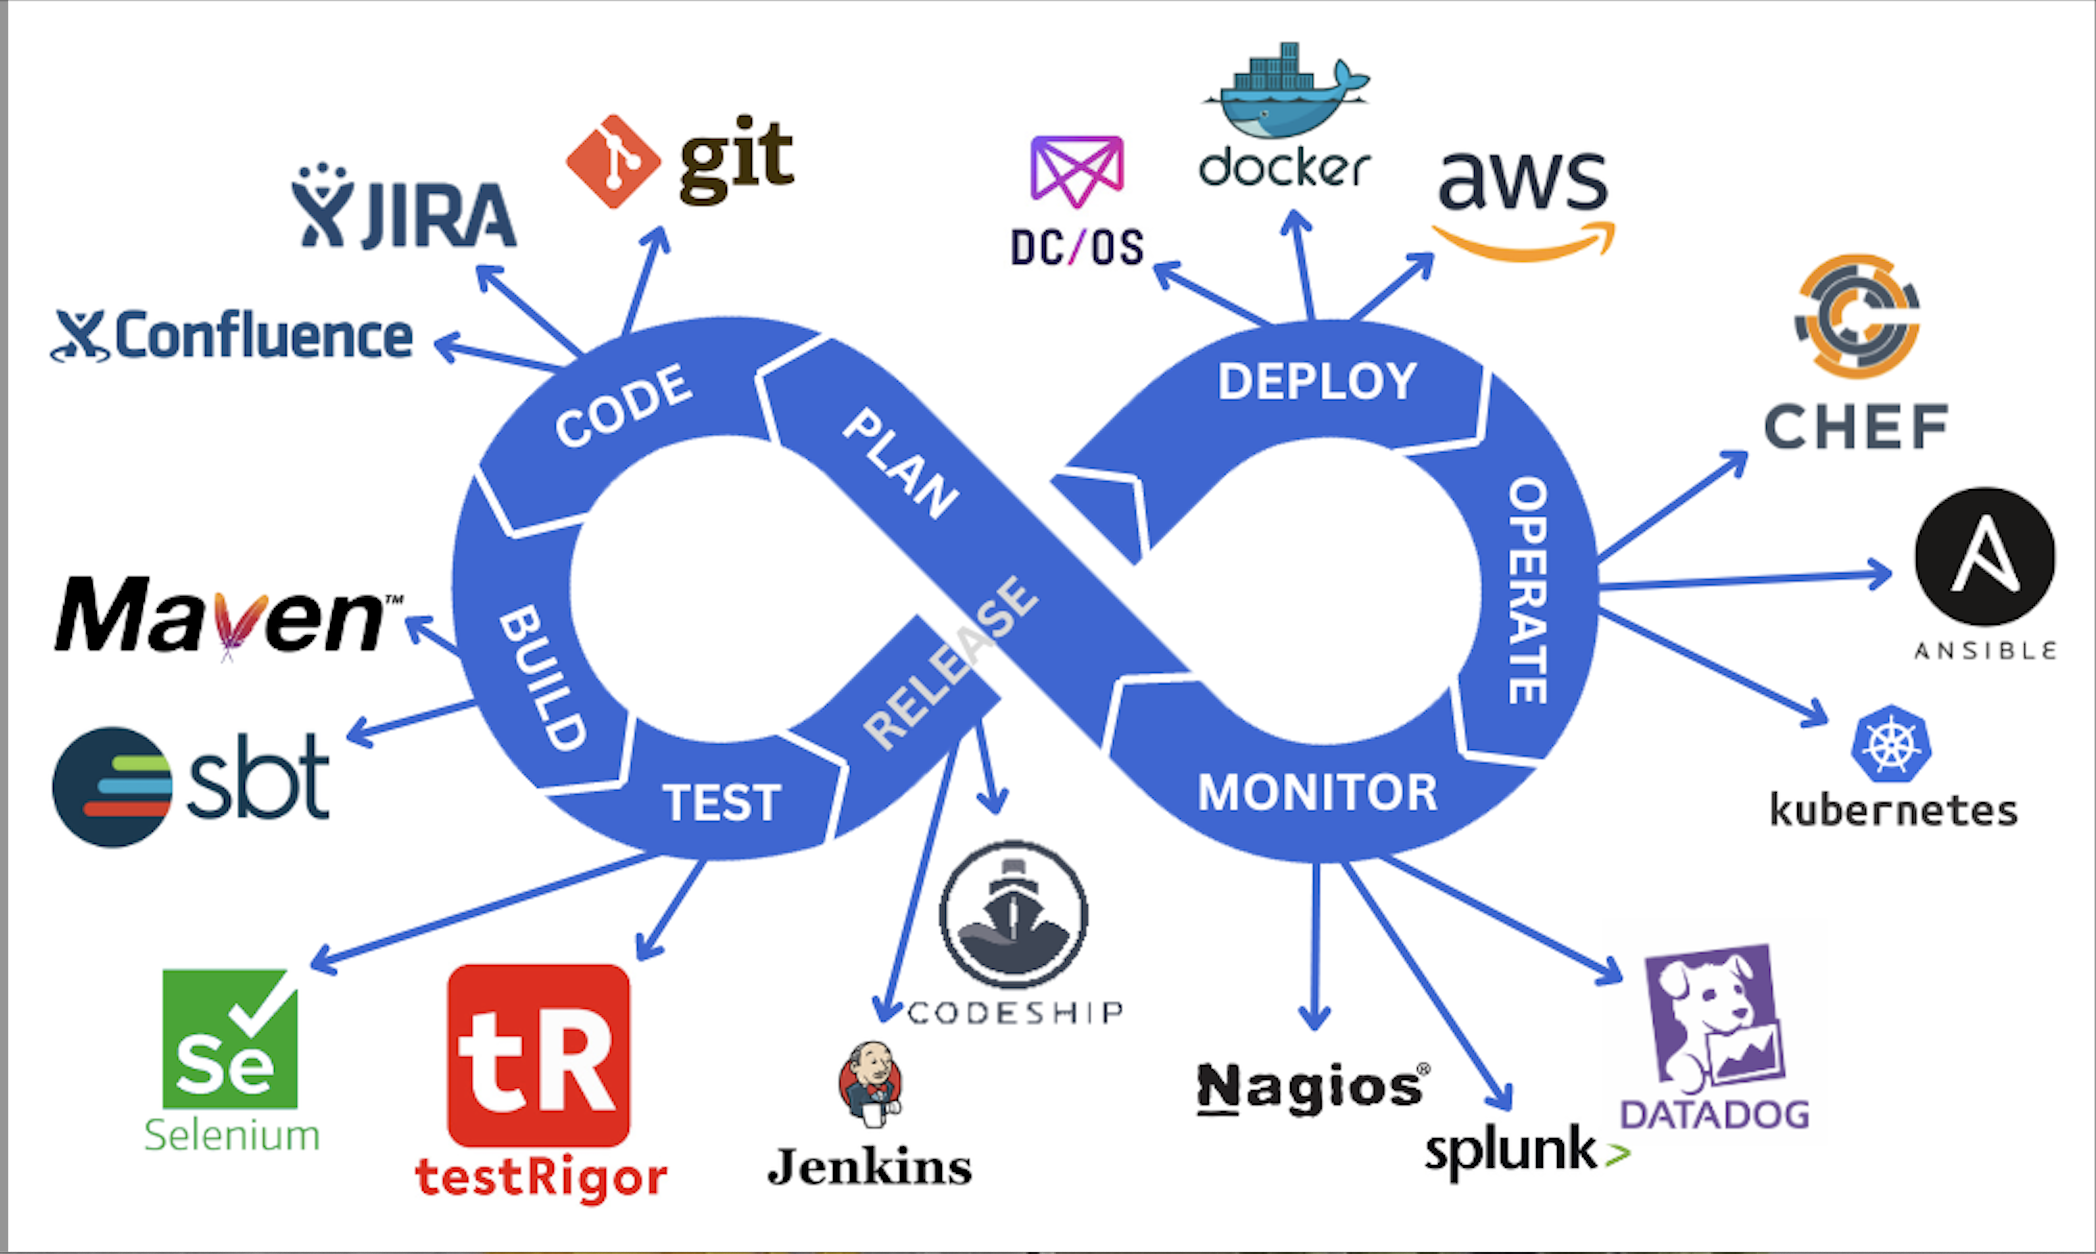